In [48]:
import import_ipynb
import importlib
import switrs_data
from switrs_data import SwitrsData
importlib.reload(switrs_data)
switrsdata = SwitrsData()

importing Jupyter notebook from switrs_data.ipynb


In [44]:
!pip install scikit-learn-intelex

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [49]:

from sklearnex import patch_sklearn 
patch_sklearn()
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from time import perf_counter
from sklearn.model_selection import StratifiedKFold, learning_curve
%matplotlib inline


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [50]:
'''
      _           _     _               _______                 
     | |         (_)   (_)             |__   __|                
   __| | ___  ___ _ ___ _  ___  _ __      | |_ __ ___  ___  ___ 
  / _` |/ _ \/ __| / __| |/ _ \| '_ \     | | '__/ _ \/ _ \/ __|
 | (_| |  __/ (__| \__ \ | (_) | | | |    | | | |  __/  __/\__ \
  \__,_|\___|\___|_|___/_|\___/|_| |_|    |_|_|  \___|\___||___/
                                                                
'''
from sklearn.tree import DecisionTreeClassifier


In [51]:
def best_score(scores, SCORE_TYPE):
    best = {key: {"label":"", "score":0} for key in SCORE_TYPE}
    
    
    for i in range(len(scores)):
        for s in SCORE_TYPE:
            if scores[i]['scores'][s] > best[s]["score"]:
                best[s]["label"] = scores[i]['label']
                best[s]["score"] = scores[i]['scores'][s]
    return best
        

In [52]:
X_train, y_train, X_test, y_test = switrsdata.load(undersample=True, verbose=True, year=2018)


Index(['weather', 'state_highway_indicator', 'type_of_collision',
       'road_condition', 'lighting', 'motorcycle_collision',
       'bicycle_collision', 'pedestrian_collision', 'alcohol_involved',
       'severe_injury_count', 'killed_victims', 'pedestrian_killed_count',
       'motorcyclist_killed_count', 'bicyclist_killed_count',
       'pcf_violation_category', 'collision_date'],
      dtype='object')
Loading 482296 rows
split: Train:  337607 337607 Test:  144689 144689
after resample
split: Train:  24452 24452 Test:  24452 24452


In [54]:
#first create decision tree with varying depth
SCORE_TYPE = ["accuracy", "f1",]
scores = []
for i in range(1,40):
    clf = DecisionTreeClassifier(
        random_state=42,
        max_depth = i,
        criterion="entropy"
    )
    scores.append({
        "label":f'max_depth_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(clf, X_train, y_train,scoring=s, cv=6, n_jobs=6))/6
        scores[-1]["times"][s] = perf_counter() - t


In [55]:
knn_k_scores= scores
print(best_score(knn_k_scores, SCORE_TYPE))
knn_k_scores

{'accuracy': {'label': 'max_depth_12', 'score': 0.7852931820964054}, 'f1': {'label': 'max_depth_14', 'score': 0.7691345773480368}}


[{'label': 'max_depth_1',
  'scores': {'accuracy': 0.6009322363839603, 'f1': 0.3358919067233812},
  'times': {'accuracy': 1.2966932710260153, 'f1': 0.1374383110087365}},
 {'label': 'max_depth_2',
  'scores': {'accuracy': 0.6791672536730545, 'f1': 0.5472310651513747},
  'times': {'accuracy': 0.1381630749674514, 'f1': 0.13597670407034457}},
 {'label': 'max_depth_3',
  'scores': {'accuracy': 0.7306968317709933, 'f1': 0.6570078804792767},
  'times': {'accuracy': 0.1381890440825373, 'f1': 0.13484745903406292}},
 {'label': 'max_depth_4',
  'scores': {'accuracy': 0.7575246893883293, 'f1': 0.7231833280423118},
  'times': {'accuracy': 0.14447774994187057, 'f1': 0.15722084103617817}},
 {'label': 'max_depth_5',
  'scores': {'accuracy': 0.7755188935782504, 'f1': 0.7544824611947961},
  'times': {'accuracy': 0.164287130930461, 'f1': 0.15785368101205677}},
 {'label': 'max_depth_6',
  'scores': {'accuracy': 0.7753144548065287, 'f1': 0.7516887244055278},
  'times': {'accuracy': 0.1701433879788965, 'f1'

In [58]:
#find the best feature count
scores = []
for i in range(1,20):
    clf = DecisionTreeClassifier(
        random_state=42,
        criterion="entropy",
        max_features=i
    )
    scores.append({
        "label":f'max_features_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(clf, X_train, y_train,scoring=s, cv=6, n_jobs=6))/6
        scores[-1]["times"][s] = perf_counter() - t

In [59]:
#print the results (used for graphing as well)
min_samples_scores = scores
print(best_score(min_samples_scores, SCORE_TYPE))
min_samples_scores

{'accuracy': {'label': 'max_features_16', 'score': 0.7738014533676106}, 'f1': {'label': 'max_features_16', 'score': 0.7598353822449279}}


[{'label': 'max_features_1',
  'scores': {'accuracy': 0.76778983565828, 'f1': 0.7519762541388827},
  'times': {'accuracy': 0.15995598305016756, 'f1': 0.16422614606563002}},
 {'label': 'max_features_2',
  'scores': {'accuracy': 0.7643543030076803, 'f1': 0.7477993332585499},
  'times': {'accuracy': 0.16374609607737511, 'f1': 0.16159474896267056}},
 {'label': 'max_features_3',
  'scores': {'accuracy': 0.7710614480293644, 'f1': 0.7563837916778525},
  'times': {'accuracy': 0.16019589500501752, 'f1': 0.16619943105615675}},
 {'label': 'max_features_4',
  'scores': {'accuracy': 0.7689347489719861, 'f1': 0.7533472896740158},
  'times': {'accuracy': 0.16496467404067516, 'f1': 0.16609682294074446}},
 {'label': 'max_features_5',
  'scores': {'accuracy': 0.7676263368192481, 'f1': 0.7519808467098956},
  'times': {'accuracy': 0.1724290270358324, 'f1': 0.16128780704457313}},
 {'label': 'max_features_6',
  'scores': {'accuracy': 0.7716341154064592, 'f1': 0.7567667759320709},
  'times': {'accuracy': 0.1

In [63]:
#print the results (used for graphing as well)
training_scores = scores
training_scores
estimator = clf = DecisionTreeClassifier(
        random_state=42,
        max_depth=12,
        criterion="entropy",
        max_features=16
    )
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train, cv=6,return_times=True, n_jobs=6)



f1: 0.2246475134210371
acc 0.8183275853727651


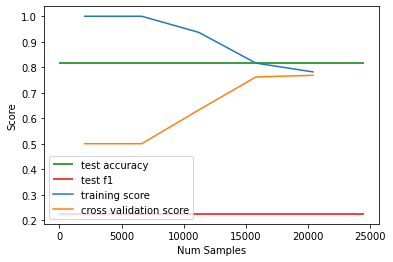

In [64]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='green', xmin=0, xmax = len(X_train), label="test accuracy")
plt.hlines(y=metrics.f1_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test f1")
plt.legend(loc="best")


plt.plot(train_sizes,np.mean(train_scores,axis=1), label="training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="cross validation score")
print("f1:",metrics.f1_score(y_test, y_pred))
print("acc", metrics.accuracy_score(y_test, y_pred))
plt.xlabel("Num Samples")
plt.ylabel("Score")
plt.legend(loc="best")

In [78]:
#best is depth 18 and min sample split of 13
#test set on best
t = perf_counter()
clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=18,
    criterion="entropy",
    max_features=13
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
print(perf_counter() - t)

Accuracy: 0.8386570796671454
Precision: 0.1274745546305135
f1: 0.21723485270977297
3.1067411300027743


In [65]:
'''
  _                     _   
 | |                   | |  
 | |__   ___   ___  ___| |_ 
 | '_ \ / _ \ / _ \/ __| __|
 | |_) | (_) | (_) \__ \ |_ 
 |_.__/ \___/ \___/|___/\__|
                            
                            
'''
from sklearn.ensemble import AdaBoostClassifier


In [66]:
scores = []
SCORE_TYPE = ["accuracy"]
n_i=[50,500,1000]
for i in n_i:
    print(i)
    base = DecisionTreeClassifier(max_depth=1, criterion="entropy")
    model = AdaBoostClassifier(base_estimator=base,  n_estimators=(i))
    scores.append({
        "label":f'n_estimators_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(model, X_train, y_train, scoring=s, cv=6, n_jobs=6))/6
        scores[-1]["times"][s] = perf_counter() - t

50
500
1000


In [67]:
#print the results (used for graphing as well)
n_estimators_score = scores
print(best_score(n_estimators_score, SCORE_TYPE))
n_estimators_score

{'accuracy': {'label': 'n_estimators_500', 'score': 0.786642955622317}}


[{'label': 'n_estimators_50',
  'scores': {'accuracy': 0.7856204507004944},
  'times': {'accuracy': 1.3716310969321057}},
 {'label': 'n_estimators_500',
  'scores': {'accuracy': 0.786642955622317},
  'times': {'accuracy': 11.942256176029332}},
 {'label': 'n_estimators_1000',
  'scores': {'accuracy': 0.786642955622317},
  'times': {'accuracy': 23.69805275904946}}]

In [68]:
scores = []
SCORE_TYPE = ["accuracy"]
d = [1,3,5,7,9]
for i in d:
    print(i)
    base = DecisionTreeClassifier(max_depth=i, criterion="entropy")
    model = AdaBoostClassifier(base_estimator=base,  n_estimators=500)
    scores.append({
        "label":f'n_estimators_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(model, X_train, y_train, scoring=s, cv=6, n_jobs=6))/6
        scores[-1]["times"][s] = perf_counter() - t

1
3
5
7
9


In [69]:
max_depth_boost = scores
print(best_score(max_depth_boost, SCORE_TYPE))
max_depth_boost

{'accuracy': {'label': 'n_estimators_1', 'score': 0.786642955622317}}


[{'label': 'n_estimators_1',
  'scores': {'accuracy': 0.786642955622317},
  'times': {'accuracy': 11.635181705933064}},
 {'label': 'n_estimators_3',
  'scores': {'accuracy': 0.7802222295807067},
  'times': {'accuracy': 18.639592682011425}},
 {'label': 'n_estimators_5',
  'scores': {'accuracy': 0.7742103108424595},
  'times': {'accuracy': 26.509477833053097}},
 {'label': 'n_estimators_7',
  'scores': {'accuracy': 0.7750282766495883},
  'times': {'accuracy': 23.038799575995654}},
 {'label': 'n_estimators_9',
  'scores': {'accuracy': 0.773228846196299},
  'times': {'accuracy': 20.986596242059022}}]

Accuracy: 0.8355860117096079
Precision: 0.1440221683010524
Precision: 0.7242599277978339
f1: 0.2402663504952155
23.09273591893725


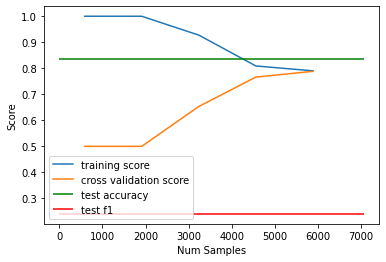

In [128]:
base = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator=base, n_estimators=500)
# model.fit(X_train, y_train)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_train, y_train, cv=6,return_times=True, n_jobs=6)



plt.plot(train_sizes,np.mean(train_scores,axis=1), label="training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="cross validation score")
plt.xlabel("Num Samples")
plt.ylabel("Score")


model.fit(X_train, y_train)
t = perf_counter()
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Precision:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='green', xmin=0, xmax = len(X_train), label="test accuracy")
plt.hlines(y=metrics.f1_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test f1")

plt.legend(loc="best")
print(perf_counter()-t)

In [74]:
'''
  _____   ___ __ ___  
 / __\ \ / / '_ ` _ \ 
 \__ \\ V /| | | | | |
 |___/ \_/ |_| |_| |_|
                      
                      
'''
from sklearn.svm import SVC
X_train, y_train, X_test, y_test = switrsdata.load(undersample=True, verbose=True, year=2018, test_size=0.5)

loading from cache
Index(['weather', 'state_highway_indicator', 'type_of_collision',
       'road_condition', 'lighting', 'motorcycle_collision',
       'bicycle_collision', 'pedestrian_collision', 'alcohol_involved',
       'severe_injury_count', 'killed_victims', 'pedestrian_killed_count',
       'motorcyclist_killed_count', 'bicyclist_killed_count',
       'pcf_violation_category', 'collision_date'],
      dtype='object')
Loading 482296 rows
split: Train:  241148 241148 Test:  241148 241148
after resample
split: Train:  17374 17374 Test:  17374 17374


In [75]:
scores = []
print(len(X_train))
SCORE_TYPE = ["accuracy"]
KERNELS = ['linear','poly', 'rbf','sigmoid']

for k in KERNELS:
    print(k)
    svm = SVC(kernel=k)

    scores.append({
        "label":f'kernel_{k}_degree_3',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(svm, X_train, y_train, scoring=s, cv=6, n_jobs=6))/6
        scores[-1]["times"][s] = perf_counter() - t

17374
linear
poly
rbf
sigmoid


In [76]:
svm_scores= scores
print(best_score(svm_scores, SCORE_TYPE))
svm_scores

{'accuracy': {'label': 'kernel_poly_degree_3', 'score': 0.7979175015982977}}


[{'label': 'kernel_linear_degree_3',
  'scores': {'accuracy': 0.7810532940835949},
  'times': {'accuracy': 6.759527024929412}},
 {'label': 'kernel_poly_degree_3',
  'scores': {'accuracy': 0.7979175015982977},
  'times': {'accuracy': 33.44136899791192}},
 {'label': 'kernel_rbf_degree_3',
  'scores': {'accuracy': 0.7975146073276781},
  'times': {'accuracy': 16.80366056493949}},
 {'label': 'kernel_sigmoid_degree_3',
  'scores': {'accuracy': 0.6651885394898805},
  'times': {'accuracy': 4.155078337993473}}]

In [77]:
scores = []
SCORE_TYPE = ["accuracy"d]
KERNELS = ['rbf']
divs = [ 1,10,100,1000,10000]
for i in divs:
    for k in KERNELS:
        svm = SVC(kernel=k, gamma=1/i)
  
        scores.append({
            "label":f'kernel_{k}_gamma_{1/i}',
            "scores":{},
            "times":{}
        })
        for s in SCORE_TYPE:
            t = perf_counter()
            scores[-1]["scores"][s] = sum(cross_val_score(svm, X_train, y_train, scoring=s, cv=6, n_jobs=6))/6
            scores[-1]["times"][s] = perf_counter() - t

In [78]:
svm_scores= scores
print(best_score(svm_scores, SCORE_TYPE))
svm_scores

{'accuracy': {'label': 'kernel_rbf_gamma_0.1', 'score': 0.7904926335174953}}


[{'label': 'kernel_rbf_gamma_1.0',
  'scores': {'accuracy': 0.7850241096448122},
  'times': {'accuracy': 9.266648806980811}},
 {'label': 'kernel_rbf_gamma_0.1',
  'scores': {'accuracy': 0.7904926335174953},
  'times': {'accuracy': 12.518336000968702}},
 {'label': 'kernel_rbf_gamma_0.01',
  'scores': {'accuracy': 0.7763908370626945},
  'times': {'accuracy': 5.209651496028528}},
 {'label': 'kernel_rbf_gamma_0.001',
  'scores': {'accuracy': 0.7714983563774463},
  'times': {'accuracy': 4.9339706369210035}},
 {'label': 'kernel_rbf_gamma_0.0001',
  'scores': {'accuracy': 0.6612179624805582},
  'times': {'accuracy': 4.882458086009137}}]

In [79]:
svm = SVC(kernel="rbf", gamma = 0.1)
svm.fit(X_train, y_train)
print("done fitting")
t = perf_counter()
y_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
print(perf_counter() - t)

done fitting
Accuracy: 0.8438096106955065
Precision: 0.15220627070629472
f1: 0.2518621511570166
2.551711381995119


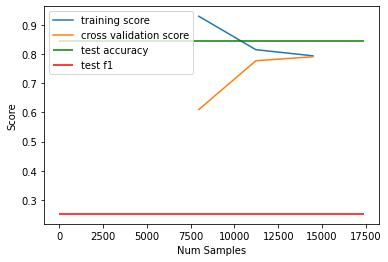

In [80]:
model = SVC(kernel="rbf", gamma = 0.1)
# model.fit(X_train, y_train)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_train, y_train, cv=6,return_times=True, n_jobs=6)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="cross validation score")
plt.xlabel("Num Samples")
plt.ylabel("Score")


# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("f1:",metrics.f1_score(y_test, y_pred))
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='green', xmin=0, xmax = len(X_train), label="test accuracy")
plt.hlines(y=metrics.f1_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test f1")


plt.legend(loc="best")
# print(perf_counter()-t)

In [83]:
'''
  _                
 | |               
 | | ___ __  _ __  
 | |/ / '_ \| '_ \ 
 |   <| | | | | | |
 |_|\_\_| |_|_| |_|
                   
                   
'''

from sklearn.neighbors import KNeighborsClassifier
# X_train, y_train, X_test, y_test = switrsdata.load(undersample=True, verbose=True, test_size=0.75)
X_train, y_train, X_test, y_test = switrsdata.load(undersample=True, verbose=True, year=2018)

loading from cache
Index(['weather', 'state_highway_indicator', 'type_of_collision',
       'road_condition', 'lighting', 'motorcycle_collision',
       'bicycle_collision', 'pedestrian_collision', 'alcohol_involved',
       'severe_injury_count', 'killed_victims', 'pedestrian_killed_count',
       'motorcyclist_killed_count', 'bicyclist_killed_count',
       'pcf_violation_category', 'collision_date'],
      dtype='object')
Loading 482296 rows
split: Train:  337607 337607 Test:  144689 144689
after resample
split: Train:  24452 24452 Test:  24452 24452


In [84]:
scores = []
SCORE_TYPE = ["accuracy"]
for i in range(1, 16, 1):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)

    scores.append({
        "label":f'knn_k_{i}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(knn, X_train, y_train, scoring=s, cv=6, n_jobs=6))/6
        scores[-1]["times"][s] = perf_counter() - t


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [85]:
knn_k_scores= scores
print(best_score(knn_k_scores, SCORE_TYPE))
knn_k_scores

{'accuracy': {'label': 'knn_k_15', 'score': 0.6743411982155006}}


[{'label': 'knn_k_1',
  'scores': {'accuracy': 0.6390481064277701},
  'times': {'accuracy': 0.6124329440062866}},
 {'label': 'knn_k_2',
  'scores': {'accuracy': 0.62375269671738},
  'times': {'accuracy': 0.5874611999606714}},
 {'label': 'knn_k_3',
  'scores': {'accuracy': 0.6526253935953088},
  'times': {'accuracy': 0.575098798959516}},
 {'label': 'knn_k_4',
  'scores': {'accuracy': 0.6370029661382607},
  'times': {'accuracy': 0.5902540020179003}},
 {'label': 'knn_k_5',
  'scores': {'accuracy': 0.6562652747089552},
  'times': {'accuracy': 0.585718953050673}},
 {'label': 'knn_k_6',
  'scores': {'accuracy': 0.6461637677581976},
  'times': {'accuracy': 0.582969225011766}},
 {'label': 'knn_k_7',
  'scores': {'accuracy': 0.6652624269754019},
  'times': {'accuracy': 0.5920985710108653}},
 {'label': 'knn_k_8',
  'scores': {'accuracy': 0.6587189212729108},
  'times': {'accuracy': 0.5935535680036992}},
 {'label': 'knn_k_9',
  'scores': {'accuracy': 0.669760902765653},
  'times': {'accuracy': 0.

In [86]:
scores = []
SCORE_TYPE = ["accuracy"]
algos= ['auto','ball_tree','kd_tree','brute']
weights = ["uniform","distance"]

for l in range(5,100,10):
    print(l)
    knn = KNeighborsClassifier(n_neighbors=15, leaf_size=l)

    scores.append({
        "label":f'knn_l_{l}',
        "scores":{},
        "times":{}
    })
    for s in SCORE_TYPE:
        t = perf_counter()
        scores[-1]["scores"][s] = sum(cross_val_score(knn, X_train, y_train, scoring=s, cv=6, n_jobs=6))/6
        scores[-1]["times"][s] = perf_counter() - t
knn_k_scores = scores
print(best_score(knn_k_scores, SCORE_TYPE))

5
15
25
35
45
55
65
75
85
95
{'accuracy': {'label': 'knn_l_5', 'score': 0.6743411982155006}}


In [87]:
knn_k_scores= scores
print(best_score(knn_k_scores, SCORE_TYPE))
knn_k_scores

{'accuracy': {'label': 'knn_l_5', 'score': 0.6743411982155006}}


[{'label': 'knn_l_5',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'accuracy': 0.591322551947087}},
 {'label': 'knn_l_15',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'accuracy': 0.592399841058068}},
 {'label': 'knn_l_25',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'accuracy': 0.5985109279863536}},
 {'label': 'knn_l_35',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'accuracy': 0.5803887590300292}},
 {'label': 'knn_l_45',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'accuracy': 0.5943316789343953}},
 {'label': 'knn_l_55',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'accuracy': 0.5950142140500247}},
 {'label': 'knn_l_65',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'accuracy': 0.5900799280498177}},
 {'label': 'knn_l_75',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'accuracy': 0.6006014050217345}},
 {'label': 'knn_l_85',
  'scores': {'accuracy': 0.6743411982155006},
  'times': {'a

Accuracy: 0.9072587647115232
Precision: 0.17893843136106802
Recall: 0.4412996389891697
f1: 0.254629533193076
2.731150725041516


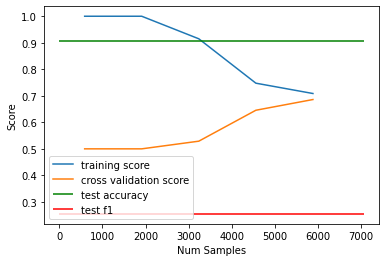

In [129]:
model = KNeighborsClassifier(n_neighbors=15)
# model.fit(X_train, y_train)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_train, y_train, cv=6,return_times=True, n_jobs=6)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="cross validation score")
plt.xlabel("Num Samples")
plt.ylabel("Score")


model.fit(X_train, y_train)
t = perf_counter()
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
plt.hlines(y=metrics.accuracy_score(y_test, y_pred), color='green', xmin=0, xmax = len(X_train), label="test accuracy")
plt.hlines(y=metrics.f1_score(y_test, y_pred), color='red', xmin=0, xmax = len(X_train), label="test f1")


plt.legend(loc="best")
print(perf_counter()-t)

In [98]:
'''
                             _            _                      _    
                            | |          | |                    | |   
  _ __   ___ _   _ _ __ __ _| |_ __   ___| |___      _____  _ __| | __
 | '_ \ / _ \ | | | '__/ _` | | '_ \ / _ \ __\ \ /\ / / _ \| '__| |/ /
 | | | |  __/ |_| | | | (_| | | | | |  __/ |_ \ V  V / (_) | |  |   < 
 |_| |_|\___|\__,_|_|  \__,_|_|_| |_|\___|\__| \_/\_/ \___/|_|  |_|\_\
                                                                      
                                                                      
'''
X_train, y_train, X_test, y_test = switrsdata.load(undersample=True, verbose=True, year=2018, test_size=0.80)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def train_validate_fold(model, _X_train, _y_train, _X_val, _y_val, epochs=200):
    model.get_weights()
    print("training for ", epochs, "epochs")
    model.fit(_X_train, _y_train, epochs=epochs, verbose = 0)
    scores = model.evaluate(_X_val, _y_val, verbose=0)
    return scores



loading from cache
Index(['weather', 'state_highway_indicator', 'type_of_collision',
       'road_condition', 'lighting', 'motorcycle_collision',
       'bicycle_collision', 'pedestrian_collision', 'alcohol_involved',
       'severe_injury_count', 'killed_victims', 'pedestrian_killed_count',
       'motorcyclist_killed_count', 'bicyclist_killed_count',
       'pcf_violation_category', 'collision_date'],
      dtype='object')
Loading 482296 rows
split: Train:  96459 96459 Test:  385837 385837
after resample
split: Train:  7056 7056 Test:  7056 7056


In [99]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Accuracy vs Loss (with validation)')

In [100]:
scores = []
nodes_to_try = [16,32,64, 128]
for n in nodes_to_try:
    print( " -- hidden", n ,"--")
    model = Sequential()
    model.add(Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(n, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    kfold.get_n_splits(X_train, y_train)
    average_scores = [0,0]
    i = 0
    runtime= perf_counter()
    for t, v in kfold.split(X_train, y_train):
        _scores = train_validate_fold(model, X_train.loc[t], y_train.loc[t], X_train.loc[v], y_train.loc[v], epochs=300)
        average_scores[0]+=_scores[0]
        average_scores[1]+=_scores[1]
        i+=1
    scores.append({
            "label":f'nn_n_{n}',
            "scores":[average_scores[0]/i, average_scores[1]/i],
            "times":(perf_counter() - runtime)/2
        })
    print("time total: ", perf_counter() - runtime)

 -- hidden 16 --
training for  300 epochs
training for  300 epochs
time total:  110.49906783690676
 -- hidden 32 --
training for  300 epochs
training for  300 epochs
time total:  111.07583907607477
 -- hidden 64 --
training for  300 epochs
training for  300 epochs
time total:  111.36607250990346
 -- hidden 128 --
training for  300 epochs
training for  300 epochs
time total:  113.50257724290714


In [101]:
scores

[{'label': 'nn_n_16',
  'scores': [0.5668460428714752, 0.7726757228374481],
  'times': 55.249530763481744},
 {'label': 'nn_n_32',
  'scores': [0.7055184841156006, 0.7691326439380646],
  'times': 55.53791815601289},
 {'label': 'nn_n_64',
  'scores': [0.8042397797107697, 0.7701247036457062],
  'times': 55.6830345914932},
 {'label': 'nn_n_128',
  'scores': [1.1463664770126343, 0.768140584230423],
  'times': 56.75128705747193}]

In [102]:
scores = []
nodes_to_try = [16,32,64, 128]
learning_rates = [.1, .01, .001, .0001]

for lr in learning_rates:

    print( " -- lr", lr ,"--")
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    kfold.get_n_splits(X_train, y_train)
    average_scores = [0,0]
    i = 0
    runtime= perf_counter()
    for t, v in kfold.split(X_train, y_train):
        _scores = train_validate_fold(model, X_train.loc[t], y_train.loc[t], X_train.loc[v], y_train.loc[v], epochs=300)
        average_scores[0]+=_scores[0]
        average_scores[1]+=_scores[1]
        i+=1
    scores.append({
            "label":f'nn_lr_{lr}',
            "scores":[average_scores[0]/i, average_scores[1]/i],
            "times":(perf_counter() - runtime)/2
        })
    print("time total: ", perf_counter() - runtime)

 -- lr 0.1 --
training for  300 epochs
training for  300 epochs
time total:  112.54831042292062
 -- lr 0.01 --
training for  300 epochs
training for  300 epochs
time total:  110.90962818393018
 -- lr 0.001 --
training for  300 epochs
training for  300 epochs
time total:  110.69289446005132
 -- lr 0.0001 --
training for  300 epochs
training for  300 epochs
time total:  111.6576598000247


In [103]:
scores

[{'label': 'nn_lr_0.1',
  'scores': [0.6431355178356171, 0.7645975053310394],
  'times': 56.27415407495573},
 {'label': 'nn_lr_0.01',
  'scores': [0.9124759435653687, 0.7653061151504517],
  'times': 55.45481279300293},
 {'label': 'nn_lr_0.001',
  'scores': [0.5557568371295929, 0.7714002430438995],
  'times': 55.34644615452271},
 {'label': 'nn_lr_0.0001',
  'scores': [0.44833482801914215, 0.7920918464660645],
  'times': 55.82882828748552}]

In [126]:
#you can see the val_acc and val loss are never able to get to a good place. maybe not enough capacity
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [127]:
t = perf_counter()
history = model.fit(X_train, y_train, epochs=300, verbose=1, validation_split=0.2 )
print("train time", perf_counter()-t)

Epoch 1/300
177/177 [==============================] - 1s 3ms/step - loss: 0.7213 - accuracy: 0.4142 - val_loss: 0.6092 - val_accuracy: 0.7741
Epoch 2/300
177/177 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5477 - val_loss: 0.6669 - val_accuracy: 0.5595
Epoch 3/300
177/177 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.7039 - val_loss: 0.7051 - val_accuracy: 0.4299
Epoch 4/300
177/177 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7344 - val_loss: 0.7210 - val_accuracy: 0.4129
Epoch 5/300
177/177 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.7427 - val_loss: 0.7230 - val_accuracy: 0.4065
Epoch 6/300
177/177 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7489 - val_loss: 0.7201 - val_accuracy: 0.4221
Epoch 7/300
177/177 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7580 - val_loss: 0.7052 - val_accuracy: 0.4738

12058/12058 [==============================] - 17s 1ms/step - loss: 0.4285 - accuracy: 0.8584
[0.42852702736854553, 0.8583858013153076]
evaluation time 17.385134986019693


<Figure size 576x432 with 0 Axes>

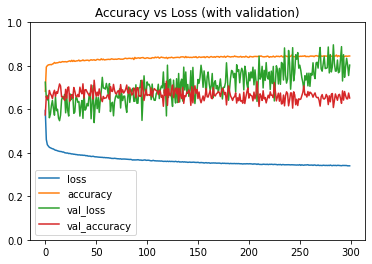

In [123]:
t = perf_counter()
plot_loss_accuracy(history)
y_train

print(model.evaluate(X_test, y_test))
print("evaluation time", perf_counter()-t)